<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/dz_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание №15: Библиотека Itertools and Co. Прикладные комбинаторные задачи.**

1 Как подключить библиотеку?

Можно подключить модуль itertools в Python просто записав в начале программы import
itertools *. При таком подключении необходимо будет обращаться к той же функции
product следующим образом: itertools.product( [аргументы функции] )

In [ ]:
import itertools

**2 Назовите три функции - итератора бесконечной итерации.**


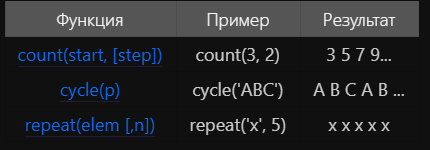

**3 Назовите функции - итераторы комбинации значений.**


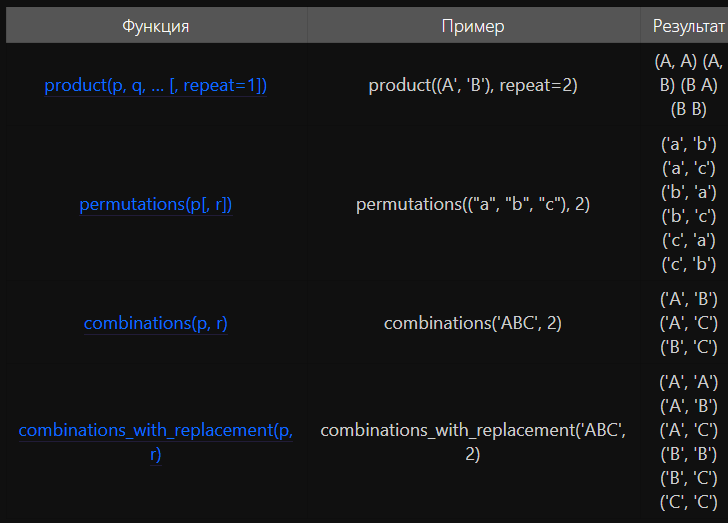

**4 Напишите инструменты фильтрации последовательности**

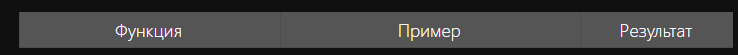

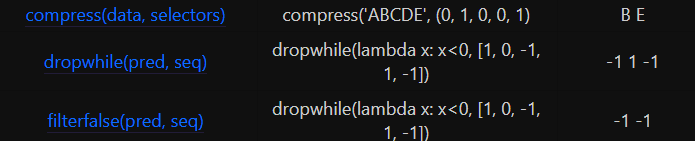

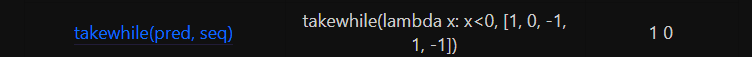

**КОНСПЕКТ**

In [4]:
import itertools

In [ ]:
'''
1.accumulate(l)
создает итератор, который возвращает накопленную сумму или накопленный результат других бинарных функций,
которые указаны в параметре func
'''
l = [1,2,3,4,5,6,7]
for i,val in enumerate(itertools.accumulate(l)):
  print(f'{i}:{val}')


In [ ]:
'''
другие функции - аккомулированное умножение
'''
import operator
from functools import reduce

for i,val in enumerate(itertools.accumulate(l, operator.mul)):
  print(f'{i}:{val}')


In [ ]:
'''
reduce - сводит к последнему результату последовательности действий
'''
reduce(operator.mul,l)

In [8]:
'''
определим декоратор для подсчета кол-ва времени подсчета факториала разными спообами от произвольного числа
'''
import time
def timing_val(func):
  def wrapper(*arg,**kw):
    print(func.__name__, 'running')
    t1=time.time()
    res=func(*arg,**kw)
    t2=time.time()
    print(f'It look {t2-t1} sec tu run this code')

    return res
  return wrapper

'''
реализуем фаториал без цикла
'''
@timing_val
def factorial(n):
  *_, last = itertools.accumulate(range(1,n+1), operator.mul)
  return last

@timing_val
def factorial_r(n):
  return reduce(operator.mul, range(1,n+1))

@timing_val
def factorial_c(n):
  x=1
  for x_ in range(2,n+1):
    x*= x_
  return x


In [9]:
factorial(50000)
factorial_c(50000)
factorial_r(50000);

factorial running
It look 1.1229417324066162 sec tu run this code
factorial_c running
It look 0.5427393913269043 sec tu run this code
factorial_r running
It look 0.671065092086792 sec tu run this code


In [ ]:
'''
еще одно удобство reduce. смержим датафреймы
'''

import pandas as pd
df1 = pd.DataFrame({'A' : list(range(100)), 'I' : list(range(100))})
df2 = pd.DataFrame({'B' : list(range(100)), 'I' : list(range(100))})
df3 = pd.DataFrame({'C' : list(range(100)), 'I' : list(range(100))})

reduce(lambda left, right: pd.merge(left, right, on = 'I'), [df1,df2,df3])


In [15]:
'''
2. chain()
создет итератор, котроый возвращает элемент из итерируемого обьекта до тех пор, пока он не закончится,
а потом переходит к следующему. Он будет рассматривать последовтельности, идущие друг за другом, как одну
'''
l = [[1,2],[3],[4,5,6]]
list(itertools.chain(*l))

[1, 2, 3, 4, 5, 6]

In [35]:
'''
3. dropwhile()
создает итератор, который выбрасывает элементы итеррируемого обьекта до тех пор, пока предикат (predicate)
имеет значение True, а затем возвращает каждый элемент. Итератор не вернет выходных данных, пока предикат на получит значение  False
'''
it = range(10,1,-1)

list(itertools.dropwhile(lambda x:x>4, it))

[4, 3, 2]

In [36]:
'''
4. takewhile()
создает итератор, который возвращает элементы итеррируемого обьекта до тех пор, пока предикат (predicate)
имеет значение True, а затем возвращает каждый элемент. Итератор не вернет выходных данных, пока предикат на получит значение  False

'''
list(itertools.takewhile(lambda x:x>4, it))


[10, 9, 8, 7, 6, 5]

In [37]:
from typing import Sequence
'''
5 Groupby()
на вход методу мы подаем итеррируемую последовательность и некоторую функция keyfunc, определяющую группировку обьектов
прмер: заделим четные и нечетные числа
'''

from itertools import groupby
keyfunc = lambda x: 'нечетные' if int(x%2) else 'четные'
sequence = [i for i in range(10)]

sequence = sorted(sequence, key=keyfunc)

for group, nums in groupby(sequence, keyfunc):
  print(group, list(nums))

нечетные [1, 3, 5, 7, 9]
четные [0, 2, 4, 6, 8]


***задача**


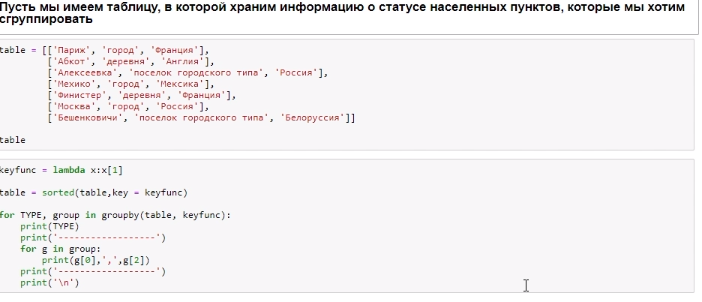

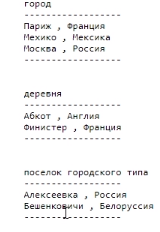

**комбинаторика**

In [ ]:
"""
1. product()
декартово произведение
"""
list(itertools.product('ABCD', [1,2,3,4,5]))

In [ ]:
"""
2. permutations()
последовательные перестановки
"""

list(itertools.permutations('ABCD'))

In [ ]:
'''
3.combinations()
возвращвет подпоследовательности длины r элементов итеррироуемого обьекта, подаваемого на вход
'''

print(list(itertools.combinations('ABC', 2))) # C n по k
print(list(itertools.combinations_with_replacement('ABC', 2))) # с повторениями

https://pylot.me/article/MNW-itertools-cheatsheet/#